In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess
import random
import time

In [2]:
def getLenNum(s):
    for i in range(len(s) - 1):
        if(s[i:i+1] == ' ' or s[i:i+1] == '\\'):
            return i
    return(len(s) - 1)

In [3]:
start = time.time()
s = subprocess.run('desktop/fewbody_PN/sigma_binsingle -v .5 -m 55 -n 55 -o 55 -r .0002 -g .0002 -i .0002 -e .99 -a %f -A 1e-6 -R 1e-6' % A((3.0 * 10 ** 8) * 5e-3, 55, 55, 55, .5),
               stdout=subprocess.PIPE, stderr=subprocess.STDOUT, shell=True)
end = time.time()

print(end - start)

NameError: name 'A' is not defined

In [9]:
print(s)

NameError: name 's' is not defined

In [10]:
def A(v, m01, m02, m1, vRatio): #vRatio = v / v_c
    G = 6.674 * (10 ** -11) # m^3 kg^-1 s^-2
    m01 = m01 * (1.99 * 10 ** 30)
    m02 = m02 * (1.99 * 10 ** 30)
    m0 = m01 + m02
    m1 = m1 * (1.99 * 10 ** 30)
    mu =  m0 * m1 / (m0 + m1)
    return (((G / mu) * (m01 * m02)) / (((v / (vRatio)) ** 2))) * (6.685 * 10 ** -12)

In [20]:
A((5e-3)*3.0e8, 55, 55, 55, .5)

0.008138645450833334

In [13]:
def extractOutput(rawString):
    retList = [] # resonance, exchange
    for j in range(1, len(rawString) - 1):
        if(rawString[j:j+5] == 'tion)'):
            if(rawString[j + 7 :j +  8] != ' '): 
                stop = getLenNum(rawString[j + 7 :])
                retList.append(rawString[j + 7 : j + 7 + stop])
            elif(rawString[j + 8 :j +  9] != ' '):
                stop = getLenNum(rawString[j + 8 :])
                retList.append(rawString[j + 8 : j + 8 + stop])
            else:
                retList.append(0)
        if(rawString[j:j+5] == 'ge_1)'):
            stop = getLenNum(rawString[j + 7 :])
            retList.append(rawString[j + 7 : j + 7 + stop])
            stop2 = getLenNum(rawString[j + 7 + stop + 2 :])
            stop3 = getLenNum(rawString[j + 7 + stop + 2 + stop2 + 2:])
            stop4 = getLenNum(rawString[j + 7 + stop + 2 + stop2 + 2 + stop3 + 2:])
            retList.append(rawString[j + 7 + stop + 2 + stop2 + 2 + stop3 + 2: j + 7 + stop + 2 + stop2 + 2 + stop3 + 2 + stop4])
        if(rawString[j:j+5] == 'ge_2)'):
            stop = getLenNum(rawString[j + 7 :])
            retList.append(rawString[j + 7 : j + 7 + stop])
            stop2 = getLenNum(rawString[j + 7 + stop + 2 :])
            stop3 = getLenNum(rawString[j + 7 + stop + 2 + stop2 + 2:])
            stop4 = getLenNum(rawString[j + 7 + stop + 2 + stop2 + 2 + stop3 + 2:])
            retList.append(rawString[j + 7 + stop + 2 + stop2 + 2 + stop3 + 2: j + 7 + stop + 2 + stop2 + 2 + stop3 + 2 + stop4])
            break
      
    for i in range(len(retList)):
        if(retList[i] != ''):
            retList[i] = float(retList[i])
        else:
            retList[i] = 0
    retList2 = []
    retList2.append(retList[0] + retList[1] + retList[3])
    retList2.append(retList[2] + retList[4] + (2/3) * (retList[1] + retList[3]))
    return retList2 

In [14]:
extractOutput(str(s))

NameError: name 's' is not defined

In [16]:
V = [1e-5, 5e-5, 1e-4,5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1] # in c=1 units
res = []
ex = []

res_PN = []
ex_PN = []

res_PN25 = []
ex_PN25 = []

for v in V:
    v = (3.0 * 10 ** 8) * v
    a = A(v, 55, 55, 55, .5)
    raw = subprocess.run('desktop/fewbody-0.26/sigma_binsingle -v .5 -m 55 -n 55 -o 55 -r .0002 -g .0002 -i .0002 -e .99 -a %f' % a,
               stdout=subprocess.PIPE, stderr=subprocess.STDOUT, shell=True)
    
    PNraw = subprocess.run('desktop/fewbody_PN/sigma_binsingle -v .5 -m 55 -n 55 -o 55 -r .0002 -g .0002 -i .0002 -e .99 -a %f' % a,
               stdout=subprocess.PIPE, stderr=subprocess.STDOUT, shell=True)
    
    PN25raw = subprocess.run('desktop/fewbody_PN/sigma_binsingle -v .5 -m 55 -n 55 -o 55 -r .0002 -g .0002 -i .0002 -e .99 -P 0 -Q 0 -a %f' % a,
               stdout=subprocess.PIPE, stderr=subprocess.STDOUT, shell=True)
    
    output = extractOutput(str(raw))
    PNoutput = extractOutput(str(PNraw))
    PN25output = extractOutput(str(PN25raw))
    
    res.append(output[0])
    ex.append(output[1])
    res_PN.append(PNoutput[0])
    ex_PN.append(PNoutput[1])
    res_PN25.append(PN25output[0])
    ex_PN25.append(PN25output[1])
    print(v)

KeyboardInterrupt: 

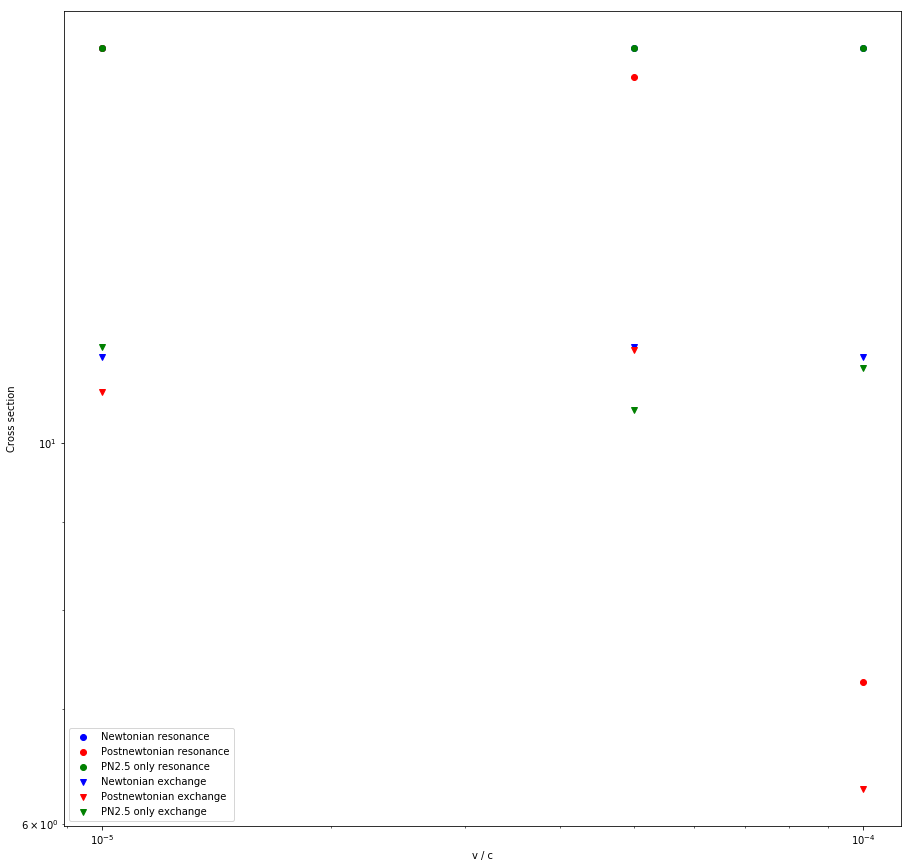

In [31]:
plt.figure(figsize=(15,15))
plt.plot(V, res, 'o', color='blue', label='Newtonian resonance')
plt.plot(V, res_PN, 'o', color='red', label='Postnewtonian resonance')
plt.plot(V, res_PN25, 'o', color='green', label='PN2.5 only resonance')
plt.plot(V, ex, 'o', color='blue', marker = 'v', label='Newtonian exchange')
plt.plot(V, ex_PN, 'o', color='red', marker = 'v', label='Postnewtonian exchange')
plt.plot(V, ex_PN25, 'o', color='green', marker = 'v', label='PN2.5 only exchange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('v / c')
plt.ylabel('Cross section')
plt.legend()

In [21]:
 A((3.0 * 10 ** 8) * 5e-1, 55, 55, 55, .5)

8.138645450833333e-07